# Regression
# customer segmentation dataset

**Assumptions of Linear Regression**
For linear regression to work effectively, several assumptions must hold:

**Linearity**: The relationship between independent variables (
X) and dependent variable (
Y) must be linear.

**Independence**: The observations should be independent of each other (no autocorrelation).

**Homoscedasticity**: The variance of errors (
ϵ) should remain constant across all values of
X. In other words, residuals (errors) should have uniform variance.

**Normality of Residuals**: The errors should be normally distributed.

**No Multicollinearity**: In multiple regression, independent variables should not be highly correlated with each other.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

file_path = "/content/drive/My Drive/bose_customer_segmentation.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,CustomerID,Age,Gender,AnnualIncome,SpendingScore,PurchaseFrequency,LoyaltyScore,ChurnLikelihood,CustomerLifetimeValue
0,1,56.0,Female,42692.0,57,38,3.468424,0,5402.03
1,2,69.0,Male,62089.0,60,24,4.399837,0,4154.57
2,3,46.0,Male,100327.0,54,23,1.784983,1,6499.16
3,4,32.0,Male,73542.0,70,22,1.502199,0,4652.11
4,5,60.0,Male,NaN,57,2,4.853920,1,3613.38


##  Understanding Columns

1. CustomerID <br>
🔹 Description: Unique identifier for each customer.<br>
🔹 Use Case: Not used for modeling but useful for tracking customers.

2. Age <br>
🔹 Description: Customer’s age (18-70, some missing values).<br>
🔹 Use Case: Helps in segmenting customers into age groups.

3. Gender <br>
🔹 Description: Categorical (Male, Female, Non-Binary). <br>
🔹 Use Case: Useful for analyzing buying behavior by gender.

4. Annual Income <br>
🔹 Description: Yearly income (some missing values & outliers). <br>
🔹 Use Case: Helps in segmenting high-income vs. low-income customers.

5. Spending Score <br>
🔹 Description: Score (1-100) representing spending habits. <br>
🔹 Use Case: Important for clustering customers based on spending behavior.

6. Purchase Frequency <br>
🔹 Description: Number of purchases made in a year. <br>
🔹 Use Case: Helps differentiate frequent vs. occasional buyers.

7. Loyalty Score <br>
🔹 Description: Score (1-5) representing customer loyalty. <br>
🔹 Use Case: Helps distinguish loyal vs. non-loyal customers.

8. Churn Likelihood <br>
🔹 Description: Binary (0 = Retained, 1 = Churned). <br>
🔹 Use Case: Target variable for classification models to predict churn.

9. Customer Lifetime Value (CLV) <br>
🔹 Description: Predicted total revenue from a customer. <br>
🔹 Use Case: Target variable for regression models to predict high-value customers.



In [3]:
df.shape

(1000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             1000 non-null   int64  
 1   Age                    975 non-null    float64
 2   Gender                 1000 non-null   object 
 3   AnnualIncome           975 non-null    float64
 4   SpendingScore          1000 non-null   int64  
 5   PurchaseFrequency      1000 non-null   int64  
 6   LoyaltyScore           1000 non-null   float64
 7   ChurnLikelihood        1000 non-null   int64  
 8   CustomerLifetimeValue  1000 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 70.4+ KB


In [5]:
df.describe(include='all')

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,PurchaseFrequency,LoyaltyScore,ChurnLikelihood,CustomerLifetimeValue
count,1000.000000,975.000000,1000,975.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,457,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,43.744615,NaN,70738.872821,50.251000,25.05900,2.975633,0.293000,4846.317390
std,288.819436,14.963796,NaN,24649.523304,27.673052,14.07948,1.147681,0.455366,2044.510457
min,1.000000,18.000000,NaN,-5487.000000,1.000000,1.00000,1.000908,0.000000,-2164.130000
25%,250.750000,31.000000,NaN,54730.000000,27.000000,13.00000,1.964299,0.000000,3527.845000
50%,500.500000,44.000000,NaN,70258.000000,51.000000,24.00000,2.948703,0.000000,4895.695000
75%,750.250000,56.000000,NaN,86947.000000,74.000000,37.25000,3.970782,1.000000,6224.112500


In [6]:
# handling missing values
from sklearn.impute import SimpleImputer
mis_values=SimpleImputer(strategy='median')
df['Age']=mis_values.fit_transform(df[['Age']])
df['AnnualIncome']=mis_values.fit_transform(df[['AnnualIncome']])



In [7]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
AnnualIncome,0
SpendingScore,0
PurchaseFrequency,0
LoyaltyScore,0
ChurnLikelihood,0
CustomerLifetimeValue,0


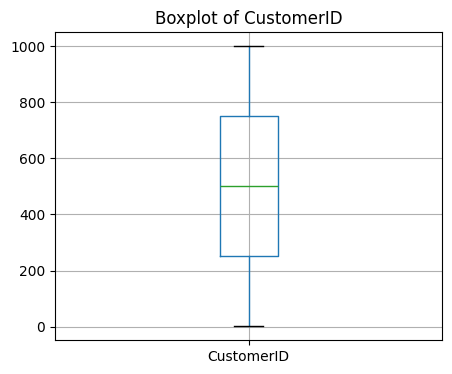

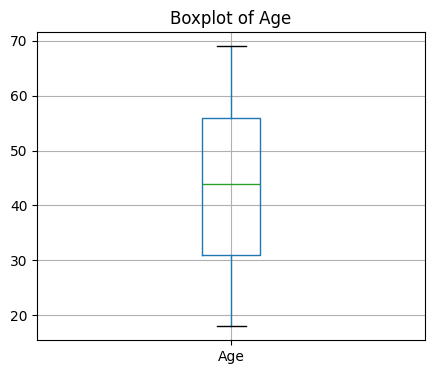

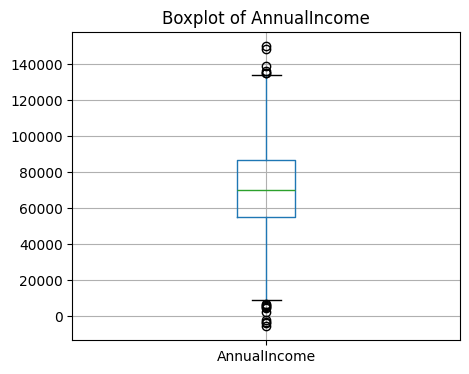

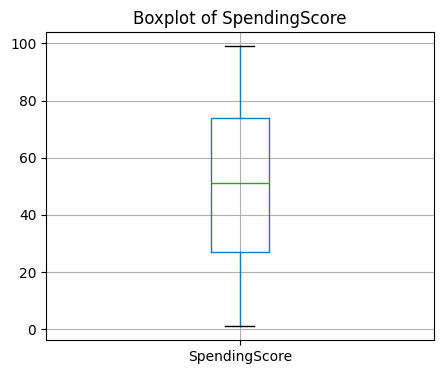

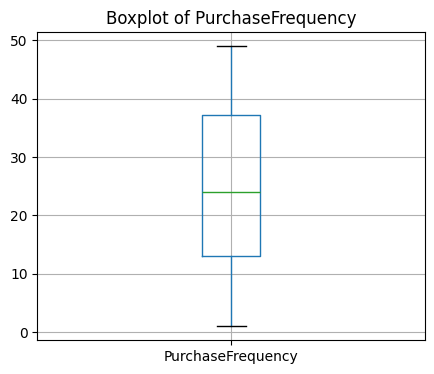

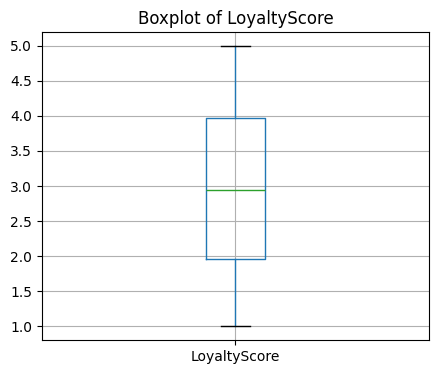

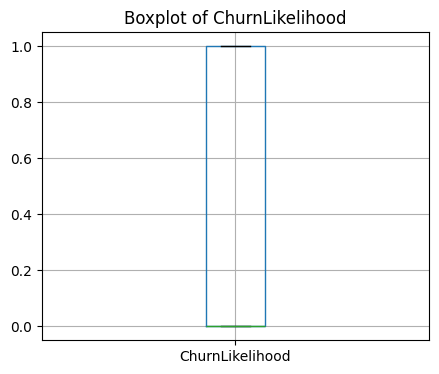

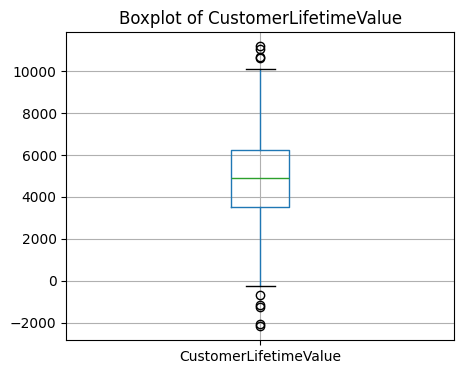

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(5,4))
  df.boxplot(i)
  plt.title(f'Boxplot of {i}')
  plt.show




In [9]:
import numpy as np
# # replacing outliers with lower and upper values (no loss of data)
def clip(x):
  lower,upper=np.percentile(x,[1,99])
  return np.clip(x,lower,upper)

In [10]:
df['AnnualIncome']=clip(df['AnnualIncome'])
df.CustomerLifetimeValue=clip(df.CustomerLifetimeValue)


In [11]:
# one hot encoding
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)
df=df.astype(int)
df.head()

,CustomerID,Age,AnnualIncome,SpendingScore,PurchaseFrequency,LoyaltyScore,ChurnLikelihood,CustomerLifetimeValue,Gender_Male,Gender_Non-Binary
0,1,56,42692,57,38,3,0,5402,0,0
1,2,69,62089,60,24,4,0,4154,1,0
2,3,46,100327,54,23,1,1,6499,1,0
3,4,32,73542,70,22,1,0,4652,1,0
4,5,60,70258,57,2,4,1,3613,1,0


In [12]:
## standardization
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() # brings data into normal distribution (mean 0 and std 1)


In [13]:
numeric_features = ['Age', 'AnnualIncome', 'SpendingScore', 'PurchaseFrequency', 'LoyaltyScore']
df[numeric_features] = scale.fit_transform(df[numeric_features])

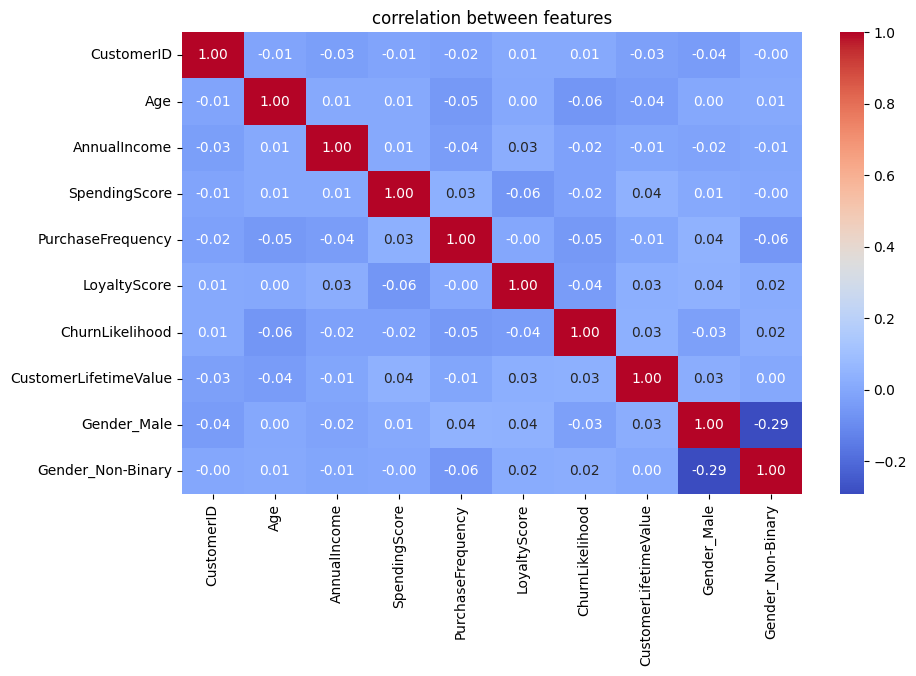

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("correlation between features")
plt.show()

In [15]:
# sns.pairplot(df)
# plt.show()

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [17]:
y=df.CustomerLifetimeValue
x=df.loc[:,df.columns!='CustomerLifetimeValue']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=model.predict(x_test)

In [21]:
model.score(x_train,y_train)

0.006842650872023626

In [22]:
mse=mean_squared_error(y_test, y_pred)
mse

3636980.913584998

In [23]:
mae=mean_absolute_error(y_test, y_pred)
mae

1500.713556854002

In [24]:
r2 = r2_score(y_test, y_pred)
r2

-0.014945074038018369

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("R² Score:", r2_score(y_test, y_pred))


R² Score: -0.05459715708127111


In [26]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Use StandardScaler because SVR is sensitive to scaling
model = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("R² Score:", r2_score(y_test, y_pred))


R² Score: -0.0035975996482231487


In [27]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("R² Score:", r2_score(y_test, y_pred))


R² Score: -0.15652132034301758


In [28]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("R² Score:", r2_score(y_test, y_pred))


R² Score: -0.24240188501046678


In [29]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(x, y)
print(pd.Series(mi_scores, index=x.columns).sort_values(ascending=False))


Gender_Male          0.014805
LoyaltyScore         0.010163
ChurnLikelihood      0.005636
SpendingScore        0.001020
PurchaseFrequency    0.000501
CustomerID           0.000000
Age                  0.000000
AnnualIncome         0.000000
Gender_Non-Binary    0.000000
dtype: float64
